In [ ]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
#Kode buat ngebaca dataset
def get_data(filename):
 
    with open(filename) as training_file:
        csv_file = csv.reader(training_file, delimiter = ',')
        first_row = True
        str_labels = []
        str_images = []
        
        for row in csv_file:
            if first_row:
                first_row = False
            else:
                str_labels.append(row[0])
                images_data = np.array_split(row[1:],28)
                str_images.append(images_data)
                
        labels = np.array(str_labels).astype('float')
        images = np.array(str_images).astype('float')
                
        
    return images, labels

path_sign_mnist_train = f"./sign_mnist_train.csv"
path_sign_mnist_test = f"./sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

#buat ngecek aja
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [ ]:
#Kode buat ngedefinisiin data buat training sama testing dari model
training_images = np.expand_dims(training_images, axis = 3)
testing_images = np.expand_dims(testing_images, axis = 3)

train_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    rescale = 1./255,)
    
print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [ ]:
#Kode buat ngedefinisiin modelnya, kompilasinya (training) sama testing hasil training modelnya
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(26, activation=tf.nn.softmax)])


model.compile(loss = 'sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


history = model.fit_generator(train_datagen.flow(training_images, training_labels),
                             epochs = 40,
                             validation_data=validation_datagen.flow(testing_images, testing_labels),
                             )

model.evaluate(testing_images, testing_labels, verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
858/858 [==============================] - 10s 11ms/step - loss: 3.0509 - accuracy: 0.0913 - val_loss: 2.0532 - val_accuracy: 0.2825
Epoch 2/40
858/858 [==============================] - 10s 11ms/step - loss: 2.2675 - accuracy: 0.2965 - val_loss: 1.4675 - val_accuracy: 0.5096
Epoch 3/40
858/858 [==============================] - 10s 11ms/step - loss: 1.7596 - accuracy: 0.4407 - val_loss: 0.9124 - val_accuracy: 0.7181
Epoch 4/40
858/858 [==============================] - 10s 11ms/step - loss: 1.4542 - accuracy: 0.5325 - val_loss: 0.8465 - val_accuracy: 0.6905
Epoch 5/40
858/858 [==============================] - 10s 11ms/step - loss: 1.2310 - accuracy: 0.5965 - val_loss: 0.5661 - val_accuracy: 0.7960
Epoch 6/40
858/858 [==============================] - 10s 11ms/step - loss: 1.0888 - accuracy: 0.6437 - val_loss: 0.5562 - val_accuracy: 0.8166
Epoch 7/40
858/858 [==============================] - 10s 11ms/step - loss: 0.9563 - accuracy: 0.6860 - val_loss: 0.4381 - val_accuracy:

[375.1992492675781, 0.6617401242256165]

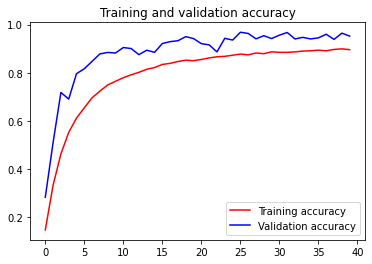

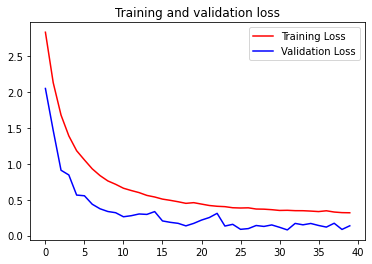

In [ ]:
#Kode buat ngeliat history training modelnya
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [26]:
#Kode buat uji coba modelnya pake input foto interaktif
import numpy as np
from google.colab import files
from keras.preprocessing import image
import cv2




uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, grayscale=True, target_size=(28, 28))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  index_max = np.argmax(classes)

  print("\n")
  print(fn)
  print(classes)
  print(index_max)
  if index_max == 0:
    print("Huruf A")
  elif index_max == 1:
    print("Huruf B")
  elif index_max == 2:
    print("Huruf C")
  elif index_max == 3:
    print("Huruf D")
  elif index_max == 4:
    print("Huruf E")
  elif index_max == 5:
    print("Huruf F")
  elif index_max == 6:
    print("Huruf G")
  elif index_max == 7:
    print("Huruf H")
  elif index_max == 8:
    print("Huruf I")
  elif index_max == 9:
    print("Huruf J")
  elif index_max == 10:
    print("Huruf K")
  elif index_max == 11:
    print("Huruf L")
  elif index_max == 12:
    print("Huruf M")
  elif index_max == 13:
    print("Huruf N")
  elif index_max == 14:
    print("Huruf O")
  elif index_max == 15:
    print("Huruf P")
  elif index_max == 16:
    print("Huruf Q")
  elif index_max == 17:
    print("Huruf R")
  elif index_max == 18:
    print("Huruf S")
  elif index_max == 19:
    print("Huruf T")
  elif index_max == 20:
    print("Huruf U")
  elif index_max == 21:
    print("Huruf V")
  elif index_max == 22:
    print("Huruf W")
  elif index_max == 23:
    print("Huruf X")
  elif index_max == 24:
    print("Huruf Y")
  elif index_max == 25:
    print("Huruf Z")
  print("\n")


Saving A.JPG to A (5).JPG
Saving B.JPG to B (3).JPG
Saving C.JPG to C (2).JPG
Saving D.JPG to D (2).JPG
Saving E.JPG to E (2).JPG
Saving F.JPG to F (2).JPG
Saving G.JPG to G (2).JPG
Saving H.JPG to H (2).JPG
Saving I.JPG to I (2).JPG
Saving K.JPG to K (2).JPG
Saving L.JPG to L (2).JPG
Saving M.JPG to M (2).JPG
Saving N.JPG to N.JPG
Saving O.JPG to O.JPG
Saving P.JPG to P.JPG
Saving Q.JPG to Q.JPG
Saving R.JPG to R.JPG
Saving S.JPG to S.JPG
Saving T.JPG to T.JPG
Saving U.JPG to U.JPG
Saving V.JPG to V.JPG
Saving W.JPG to W.JPG
Saving X.JPG to X.JPG
Saving Y.JPG to Y.JPG


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '




A.JPG
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]
0
Huruf A




B.JPG
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  2.5763336e-06 0.0000000e+00 0.0000000e+00 9.9999738e-01 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00]]
8
Huruf I




C.JPG
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]
2
Huruf C




D.JPG
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0.]]
18
Huruf S




E.JPG
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]
4
Huruf E




F.JPG
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]
5
Huruf F




G.JPG
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.